In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
torch.rand(2,3)

tensor([[0.8740, 0.6156, 0.9500],
        [0.0017, 0.7036, 0.4185]])

In [4]:
x_train = np.arange(0., 11., 1.,dtype='float')
x_train = x_train.reshape(-1,1)

y_train = (2 * x_train) + 1

print(x_train); print(y_train)

[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]
[[ 1.]
 [ 3.]
 [ 5.]
 [ 7.]
 [ 9.]
 [11.]
 [13.]
 [15.]
 [17.]
 [19.]
 [21.]]


torch.Size([11, 1])
torch.Size([11, 1])
epoch 0, loss 209.8771514892578
torch.Size([11, 1])
torch.Size([11, 1])
epoch 1, loss 17.144433975219727
torch.Size([11, 1])
torch.Size([11, 1])
epoch 2, loss 1.423555850982666
torch.Size([11, 1])
torch.Size([11, 1])
epoch 3, loss 0.1409723162651062
torch.Size([11, 1])
torch.Size([11, 1])
epoch 4, loss 0.03607851639389992
torch.Size([11, 1])
torch.Size([11, 1])
epoch 5, loss 0.027248304337263107
torch.Size([11, 1])
torch.Size([11, 1])
epoch 6, loss 0.02625662088394165
torch.Size([11, 1])
torch.Size([11, 1])
epoch 7, loss 0.02590731903910637
torch.Size([11, 1])
torch.Size([11, 1])
epoch 8, loss 0.02561345137655735
torch.Size([11, 1])
torch.Size([11, 1])
epoch 9, loss 0.02532711625099182
torch.Size([11, 1])
torch.Size([11, 1])
epoch 10, loss 0.02504417486488819
torch.Size([11, 1])
torch.Size([11, 1])
epoch 11, loss 0.024764589965343475
torch.Size([11, 1])
torch.Size([11, 1])
epoch 12, loss 0.024488037452101707
torch.Size([11, 1])
torch.Size([11, 1]

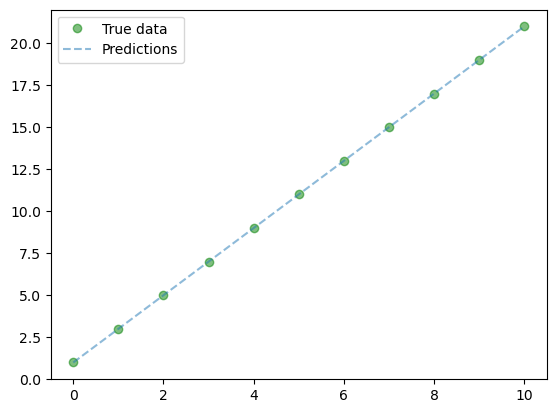

linear.weight tensor([[2.0000]])
linear.bias tensor([1.0000])


In [5]:
# create linear regression model for neural network
class LinearRegression(torch.nn.Module):
    def __init__(self, input_dim: int, output_dim: int):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        out = self.linear(x)
        return out

# create model
model = LinearRegression(input_dim=1, output_dim=1)

learning_rate = 0.01
epochs = 10000

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

train_loss_list = []

# Train model
for epoch in range(epochs):
    # Convert array to torch tensor
    inputs = torch.from_numpy(x_train).float()
    labels = torch.from_numpy(y_train).float()

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()

    # Forward to get output
    outputs = model(inputs)
    print(outputs.shape)
    print(labels.shape)
    # Calculate Loss: Mean square error (MSE)
    loss = loss_fn(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    train_loss_list.append(loss.item())

    print('epoch {}, loss {}'.format(epoch, loss.item()))

# Plot the graph
with torch.no_grad():
    predicted = model(torch.from_numpy(x_train).float()).detach().numpy()
plt.clf()
plt.plot(x_train, y_train, 'go', label = 'True data', alpha = 0.5)
plt.plot(x_train, predicted, '--', label = 'Predictions', alpha = 0.5)
plt.legend(loc = 'best')
plt.show()


#Print final parameters
for name, param in model.named_parameters():
    if param.requires_grad:
        print (name, param.data)


